In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
%%time

import os, shutil, tarfile, requests

%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorboard import notebook
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

VM_ROOT_DIR = '/content'
PROJECT_ROOT_DIR = '/content/drive/MyDrive/Formations/Openclassrooms/Projet 6'
DATA_PATH = os.path.join(VM_ROOT_DIR, "data")
os.makedirs(DATA_PATH, exist_ok=True)

url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
if url.find('/'):
  fname = url.rsplit('/', 1)[1]

r = requests.get(url, allow_redirects=True)
open(fname, 'wb').write(r.content)
print("...Archive downloaded...")


src = os.path.join(VM_ROOT_DIR, fname)
dest = os.path.join(DATA_PATH, fname)
shutil.move(src, dest)

with tarfile.open(dest, 'r') as f:
  f.extractall(DATA_PATH)

print("...Archive extracted...")

IMAGES_PATH = os.path.join(DATA_PATH, "Images")

TRAIN_PATH = os.path.join(DATA_PATH, "train")
os.makedirs(TRAIN_PATH, exist_ok=True)

VAL_PATH = os.path.join(DATA_PATH, "val")
os.makedirs(VAL_PATH, exist_ok=True)

TEST_PATH = os.path.join(DATA_PATH, "test")
os.makedirs(TEST_PATH, exist_ok=True)

val_threshold = 0.75
test_threshold = val_threshold + 0.15


UsageError: Line magic function `%tensorflow_version` not found.


In [ ]:
!rm -rf /content/data/Images/n02085782-Japanese_spaniel
!rm -rf /content/data/Images/n02085936-Maltese_dog
!rm -rf /content/data/Images/n02088238-basset
!rm -rf /content/data/Images/n02088094-Afghan_hound
!rm -rf /content/data/Images/n02087394-Rhodesian_ridgeback
!rm -rf /content/data/Images/n02087046-toy_terrier
!rm -rf /content/data/Images/n02086910-papillon
!rm -rf /content/data/Images/n02086646-Blenheim_spaniel
!rm -rf /content/data/Images/n02086240-Shih-Tzu
!rm -rf /content/data/Images/n02086079-Pekinese
!rm -rf /content/data/Images/n02085936-Maltese_dog
!rm -rf /content/data/Images/n02091635-otterhound
!rm -rf /content/data/Images/n02091467-Norwegian_elkhound
!rm -rf /content/data/Images/n02091244-Ibizan_hound
!rm -rf /content/data/Images/n02091134-whippet
!rm -rf /content/data/Images/n02091032-Italian_greyhound
!rm -rf /content/data/Images/n02090721-Irish_wolfhound
!rm -rf /content/data/Images/n02090379-redbone
!rm -rf /content/data/Images/n02089973-English_foxhound
!rm -rf /content/data/Images/n02090622-borzoi
!rm -rf /content/data/Images/n02089867-Walker_hound
!rm -rf /content/data/Images/n02089078-black-and-tan_coonhound
!rm -rf /content/data/Images/n02088632-bluetick
!rm -rf /content/data/Images/n02088466-bloodhound
!rm -rf /content/data/Images/n02088364-beagle
!rm -rf /content/data/Images/n02088238-basset
!rm -rf /content/data/Images/n02113023-Pembroke
!rm -rf /content/data/Images/n02112706-Brabancon_griffon
!rm -rf /content/data/Images/n02112350-keeshond
!rm -rf /content/data/Images/n02112137-chow
!rm -rf /content/data/Images/n02112018-Pomeranian
!rm -rf /content/data/Images/n02111889-Samoyed
!rm -rf /content/data/Images/n02111500-Great_Pyrenees
!rm -rf /content/data/Images/n02111277-Newfoundland
!rm -rf /content/data/Images/n02111129-Leonberg
!rm -rf /content/data/Images/n02110958-pug
!rm -rf /content/data/Images/n02110806-basenji
!rm -rf /content/data/Images/n02110627-affenpinscher
!rm -rf /content/data/Images/n02110185-Siberian_husky
!rm -rf /content/data/Images/n02110063-malamute
!rm -rf /content/data/Images/n02109961-Eskimo_dog
!rm -rf /content/data/Images/n02109047-Great_Dane
!rm -rf /content/data/Images/n02108915-French_bulldog
!rm -rf /content/data/Images/n02108551-Tibetan_mastiff
!rm -rf /content/data/Images/n02108089-boxer
!rm -rf /content/data/Images/n02108000-EntleBucher
!rm -rf /content/data/Images/n02107908-Appenzeller
!rm -rf /content/data/Images/n02107683-Bernese_mountain_dog
!rm -rf /content/data/Images/n02107574-Greater_Swiss_Mountain_dog
!rm -rf /content/data/Images/n02105505-komondor
!rm -rf /content/data/Images/n02105412-kelpie
!rm -rf /content/data/Images/n02105251-briard
!rm -rf /content/data/Images/n02105162-malinois
!rm -rf /content/data/Images/n02105056-groenendael
!rm -rf /content/data/Images/n02104365-schipperke
!rm -rf /content/data/Images/n02104029-kuvasz
!rm -rf /content/data/Images/n02102973-Irish_water_spaniel
!rm -rf /content/data/Images/n02102480-Sussex_spaniel
!rm -rf /content/data/Images/n02102318-cocker_spaniel
!rm -rf /content/data/Images/n02102177-Welsh_springer_spaniel
!rm -rf /content/data/Images/n02102040-English_springer
!rm -rf /content/data/Images/n02101556-clumber
!rm -rf /content/data/Images/n02101388-Brittany_spaniel
!rm -rf /content/data/Images/n02101006-Gordon_setter
!rm -rf /content/data/Images/n02100583-vizsla
!rm -rf /content/data/Images/n02100735-English_setter
!rm -rf /content/data/Images/n02100877-Irish_setter
!rm -rf /content/data/Images/n02100236-German_short-haired_pointer
!rm -rf /content/data/Images/n02099849-Chesapeake_Bay_retriever
!rm -rf /content/data/Images/n02099712-Labrador_retriever
!rm -rf /content/data/Images/n02099601-golden_retriever
!rm -rf /content/data/Images/n02099429-curly-coated_retriever
!rm -rf /content/data/Images/n02099267-flat-coated_retriever
!rm -rf /content/data/Images/n02098413-Lhasa
!rm -rf /content/data/Images/n02097047-miniature_schnauzer
!rm -rf /content/data/Images/n02096585-Boston_bull
!rm -rf /content/data/Images/n02096437-Dandie_Dinmont
!rm -rf /content/data/Images/n02096294-Australian_terrier
!rm -rf /content/data/Images/n02096177-cairn
!rm -rf /content/data/Images/n02096051-Airedale
!rm -rf /content/data/Images/n02095889-Sealyham_terrier
!rm -rf /content/data/Images/n02095570-Lakeland_terrier
!rm -rf /content/data/Images/n02095314-wire-haired_fox_terrier
!rm -rf /content/data/Images/n02094433-Yorkshire_terrier
!rm -rf /content/data/Images/n02094258-Norwich_terrier
!rm -rf /content/data/Images/n02094114-Norfolk_terrier
!rm -rf /content/data/Images/n02093991-Irish_terrier
!rm -rf /content/data/Images/n02093859-Kerry_blue_terrier
!rm -rf /content/data/Images/n02093754-Border_terrier
!rm -rf /content/data/Images/n02093647-Bedlington_terrier
!rm -rf /content/data/Images/n02093428-American_Staffordshire_terrier
!rm -rf /content/data/Images/n02093256-Staffordshire_bullterrier
!rm -rf /content/data/Images/n02092339-Weimaraner
!rm -rf /content/data/Images/n02092002-Scottish_deerhound
!rm -rf /content/data/Images/n02091831-Saluki
!rm -rf /content/data/Images/n02091467-Norwegian_elkhound
!rm -rf /content/data/Images/n02085620-Chihuahua
!rm -rf /content/data/Images/n02097130-giant_schnauzer
!rm -rf /content/data/Images/n02097209-standard_schnauzer
!rm -rf /content/data/Images/n02097298-Scotch_terrier
!rm -rf /content/data/Images/n02097474-Tibetan_terrier
!rm -rf /content/data/Images/n02098105-soft-coated_wheaten_terrier
!rm -rf /content/data/Images/n02106550-Rottweiler
!rm -rf /content/data/Images/n02107142-Doberman
!rm -rf /content/data/Images/n02107312-miniature_pinscher
!rm -rf /content/data/Images/n02109525-Saint_Bernard
!rm -rf /content/data/Images/n02108422-bull_mastiff
!rm -rf /content/data/Images/n02113186-Cardigan

In [ ]:

train_size = 0
val_size = 0
test_size = 0
num_classes = 0

for breed_dir in os.listdir(IMAGES_PATH):
  num_classes += 1
  breed_dir_path = os.path.join(IMAGES_PATH, breed_dir)
  breed_train_path = os.path.join(TRAIN_PATH, breed_dir)
  breed_val_path = os.path.join(VAL_PATH, breed_dir)
  breed_test_path = os.path.join(TEST_PATH, breed_dir)
  os.makedirs(breed_train_path, exist_ok=True)
  os.makedirs(breed_val_path, exist_ok=True)
  os.makedirs(breed_test_path, exist_ok=True)
  breed_list = os.listdir(breed_dir_path)
  breed_size = len(breed_list)
  breed_val_threshold = math.ceil(breed_size *  val_threshold)
  breed_test_threshold = math.ceil(breed_size * test_threshold)
  breed_train_range = breed_list[:breed_val_threshold]
  breed_val_range = breed_list[breed_val_threshold:breed_test_threshold]
  breed_test_range = breed_list[breed_test_threshold:breed_size]

  try:
    assert len(breed_train_range) + len(breed_val_range) + len(breed_test_range) == breed_size
  except AssertionError :
    print("Toutes les photos de la race ne sont pas prise en compte")
    print(f"Pour la race {breed_dir}")
    break

  for i, image in enumerate(breed_train_range):
    src = os.path.join(breed_dir_path, image)
    dest = os.path.join(breed_train_path, image)
    shutil.copyfile(src, dest)
    train_size += 1

  for _, image in enumerate(breed_val_range):
    src = os.path.join(breed_dir_path, image)
    dest = os.path.join(breed_val_path, image)
    shutil.copyfile(src, dest)
    val_size +=1

  for _, image in enumerate(breed_test_range):
    src = os.path.join(breed_dir_path, image)
    dest = os.path.join(breed_test_path, image)
    shutil.copyfile(src, dest)
    test_size +=1
  
print("... Data split done ...")
print(f"Nombre de classes: {num_classes}")
print(f"train set size: {train_size}")
print(f"val set size: {val_size}")
print(f"test set size: {test_size}")

... Data split done ...
Nombre de classes: 15
train set size: 1790
val set size: 357
test set size: 231


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(TRAIN_PATH,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

val_generator = datagen.flow_from_directory(VAL_PATH,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 1790 images belonging to 15 classes.
Found 357 images belonging to 15 classes.


In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

DefaultMaxPooling = partial(keras.layers.MaxPooling2D,
                 pool_size=(2,2), strides=(2,2))

model = keras.models.Sequential([
        DefaultConv2D(filters=64, input_shape=[224,224,3]),
        DefaultConv2D(filters=64),
        DefaultMaxPooling(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        DefaultMaxPooling(),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultMaxPooling(),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultMaxPooling(),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultMaxPooling(),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dense(num_classes, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

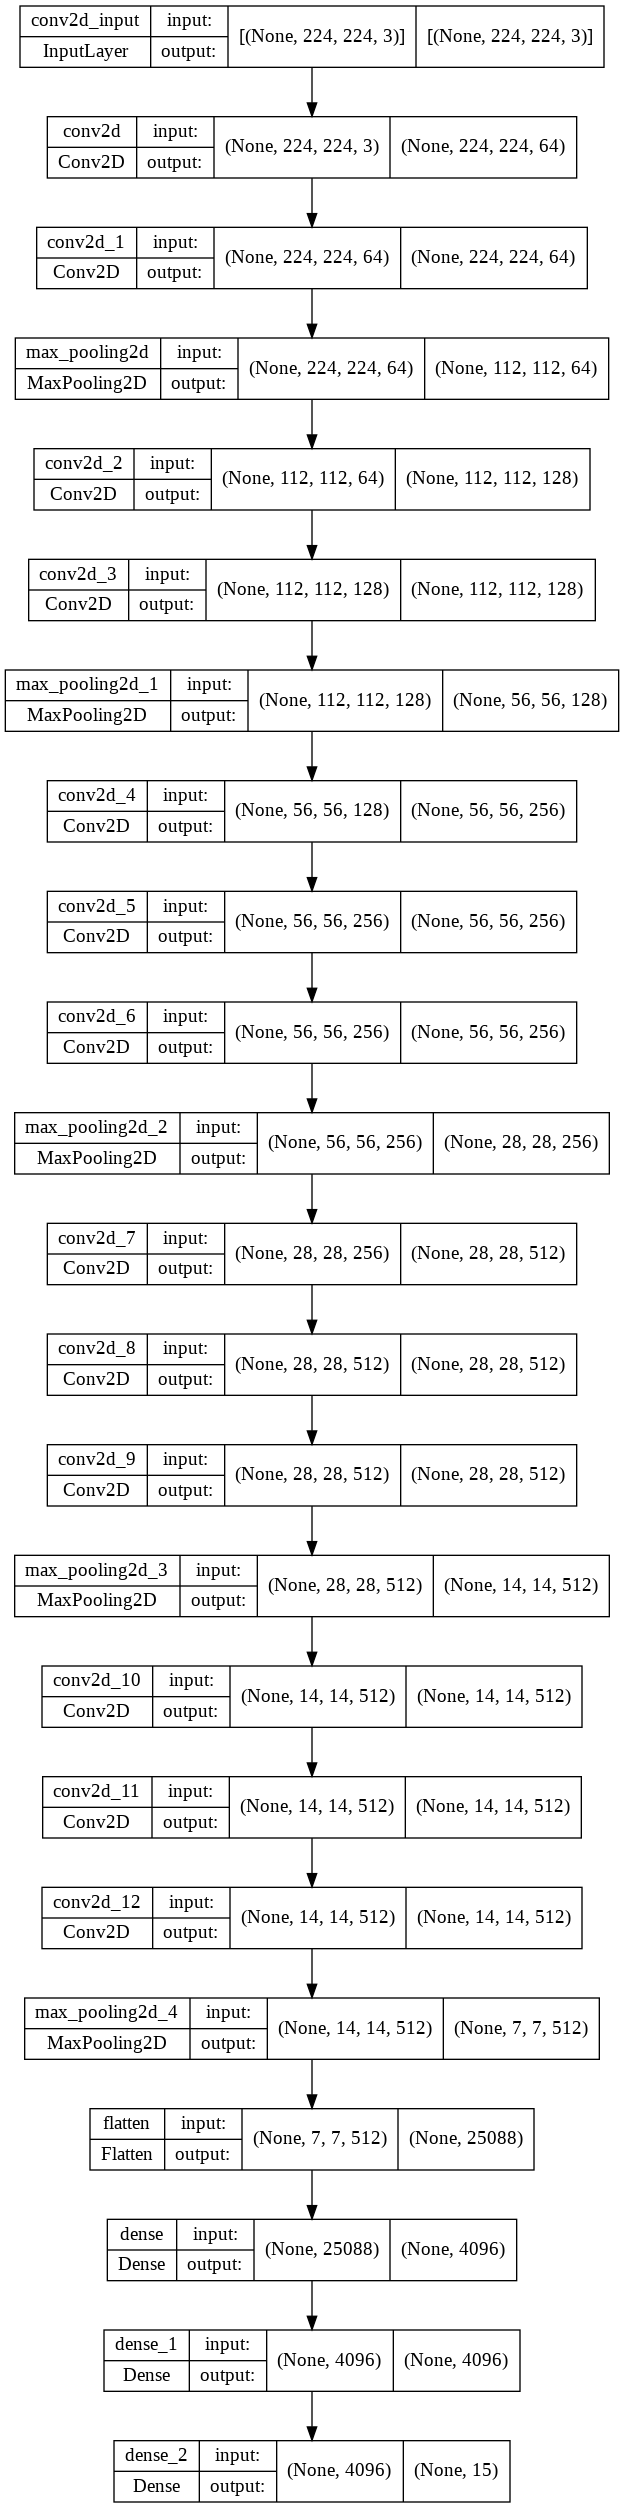

In [ ]:
FIGS_PATH = os.path.join(PROJECT_ROOT_DIR, "figures")
os.makedirs(FIGS_PATH, exist_ok=True)
keras.utils.plot_model(model, FIGS_PATH + "/my_vgg16_model.png", show_shapes=True)

In [ ]:
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(MODELS_PATH, exist_ok=True)
FILE_PATH = MODELS_PATH + "/my_vgg_model.h5"

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='max')

In [ ]:
!pip install livelossplot

     |████████████████████████████████| 793 kB 15.6 MB/s 
     |████████████████████████████████| 381 kB 51.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [ ]:
from livelossplot import PlotLossesKeras
plot_loss_cb = PlotLossesKeras()

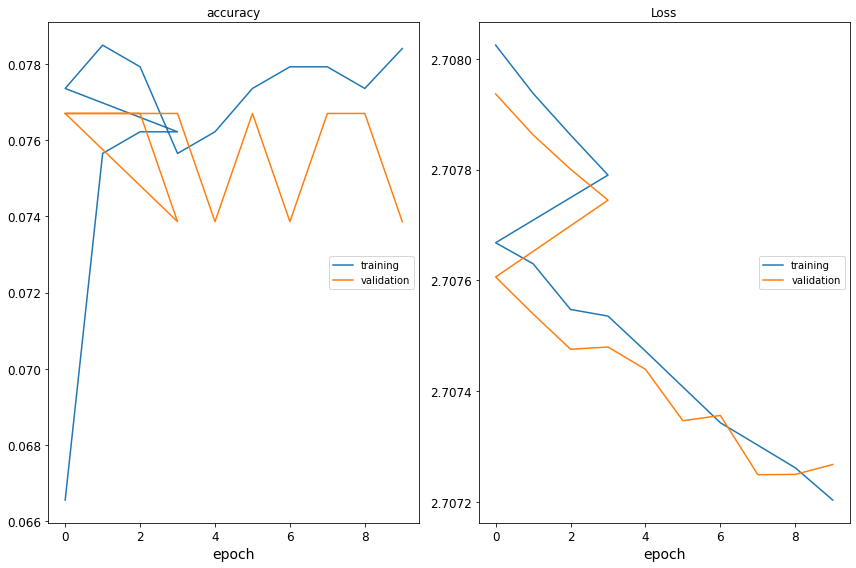

accuracy
	training         	 (min:    0.067, max:    0.078, cur:    0.078)
	validation       	 (min:    0.074, max:    0.077, cur:    0.074)
Loss
	training         	 (min:    2.707, max:    2.708, cur:    2.707)
	validation       	 (min:    2.707, max:    2.708, cur:    2.707)
55/55 [==============================] - 51s 922ms/step - loss: 2.7072 - accuracy: 0.0784 - val_loss: 2.7073 - val_accuracy: 0.0739
CPU times: user 7min 49s, sys: 13.5 s, total: 8min 2s
Wall time: 11min 5s


In [ ]:
%%time

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 32
epochs = 10

history = model.fit(
                train_generator,
                steps_per_epoch = train_size // batch_size,
                epochs=epochs,
                validation_data=val_generator,
                validation_steps = val_size // batch_size,
                callbacks=[checkpoint_cb, plot_loss_cb])

In [ ]:
test_generator = datagen.flow_from_directory(TEST_PATH,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

results = model.evaluate(test_generator, steps=test_size // batch_size)
print(f"test loss, test acc: {results}")


Found 231 images belonging to 15 classes.
7/7 [==============================] - 2s 292ms/step - loss: 2.7073 - accuracy: 0.0759
test loss, test acc: [2.7073287963867188, 0.0758928582072258]


In [ ]:
%%time

from functools import partial

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

DefaultMaxPooling = partial(keras.layers.MaxPooling2D,
                 pool_size=(2,2), strides=(2,2))

model = keras.models.Sequential([
        DefaultConv2D(filters=64, input_shape=[224,224,3]),
        DefaultConv2D(filters=64),
        DefaultMaxPooling(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        DefaultMaxPooling(),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultMaxPooling(),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultMaxPooling(),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultMaxPooling(),
        keras.layers.Flatten(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

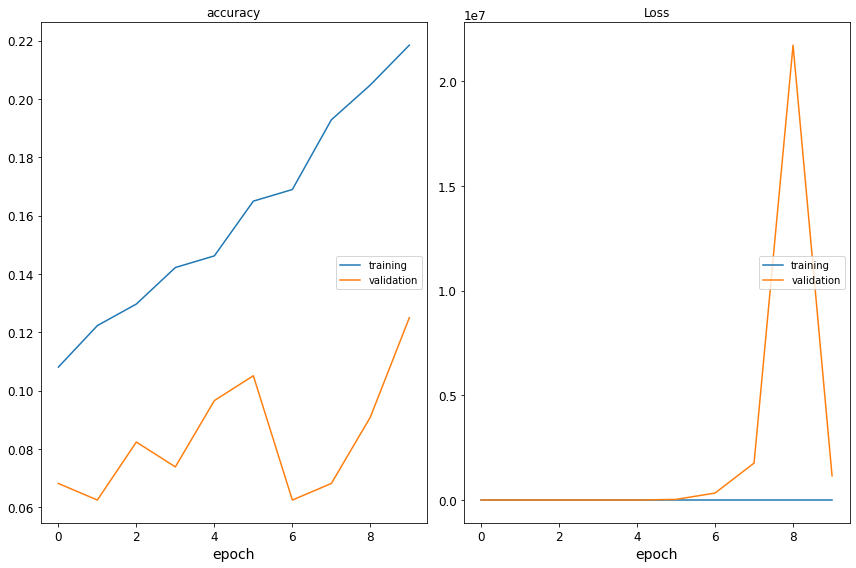

accuracy
	training         	 (min:    0.108, max:    0.218, cur:    0.218)
	validation       	 (min:    0.062, max:    0.125, cur:    0.125)
Loss
	training         	 (min:    3.419, max:    5.437, cur:    3.419)
	validation       	 (min:   50.525, max: 21724238.000, cur: 1158464.875)
55/55 [==============================] - 63s 1s/step - loss: 3.4194 - accuracy: 0.2184 - val_loss: 1158464.8750 - val_accuracy: 0.1250
CPU times: user 8min 26s, sys: 19.2 s, total: 8min 45s
Wall time: 11min 24s


In [ ]:
%%time

from keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras


MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(MODELS_PATH, exist_ok=True)
FILE_PATH = MODELS_PATH + "/my_vgg_model_optimized.h5"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(TRAIN_PATH,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

val_generator = datagen.flow_from_directory(VAL_PATH,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='max')


early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min',
                                                  verbose=1,
                                                  restore_best_weights=True)
plot_loss_cb = PlotLossesKeras()


model.compile(loss="categorical_crossentropy", 
              optimizer="rmsprop",
              metrics=["accuracy"])

batch_size = 32
epochs = 10

history = model.fit(
                train_generator,
                steps_per_epoch = train_size // batch_size,
                epochs=epochs,
                validation_data=val_generator,
                validation_steps = val_size // batch_size,
                callbacks=[checkpoint_cb,
                           early_stopping_cb,
                           plot_loss_cb])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  shuffle=False,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

results = model.evaluate(test_generator, steps=test_size // batch_size)
print(f"test loss, test acc: {results}")

Found 231 images belonging to 15 classes.
7/7 [==============================] - 2s 291ms/step - loss: 362717.7500 - accuracy: 0.1071
test loss, test acc: [362717.75, 0.1071428582072258]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

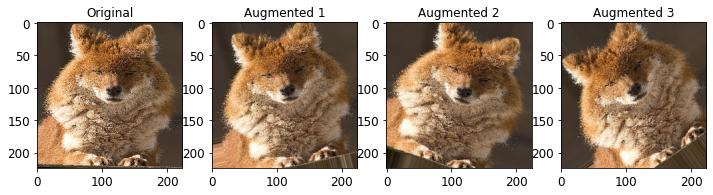

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


directory = TRAIN_PATH
test_dir_path = os.path.join(TRAIN_PATH, "n02115913-dhole")


def visualize(original, augmented):

  fig = plt.figure(figsize=(12,12))
  plt.subplot(1,4,1)
  plt.title('Original')
  plt.imshow(original)

  for i in range(3):
    plt.subplot(1,4,i+2)
    plt.title(f'Augmented {i+1}')
    plt.imshow(augmented[i])
 
def test_image_generator(datagen):
  
  fnames = [os.path.join(test_dir_path, fname) for 
            fname in os.listdir(test_dir_path)]

  img_path = fnames[3]
  img = image.load_img(img_path, target_size=(224,224))
  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)
  augmented = []

  i = 0
  for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    augmented.append(image.array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
      break

  visualize(img, augmented)


datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            fill_mode='nearest')

test_image_generator(datagen=datagen)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

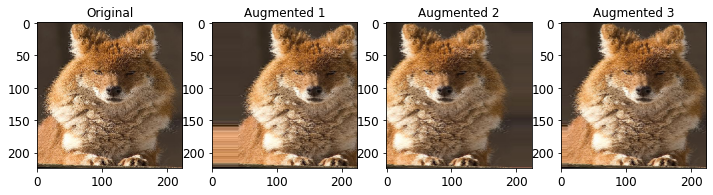

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                            width_shift_range=0.2,
                            fill_mode='nearest')

test_image_generator(datagen=datagen)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

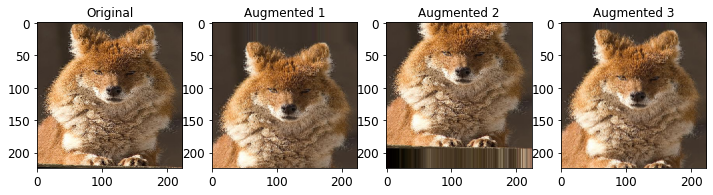

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                            height_shift_range=0.2,
                            fill_mode='nearest')

test_image_generator(datagen=datagen)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

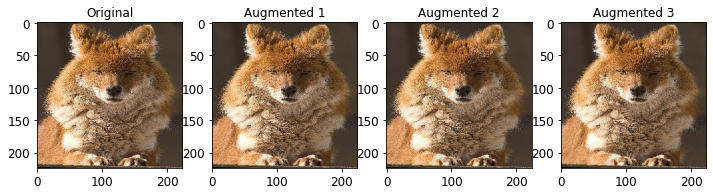

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            fill_mode='nearest')

test_image_generator(datagen=datagen)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

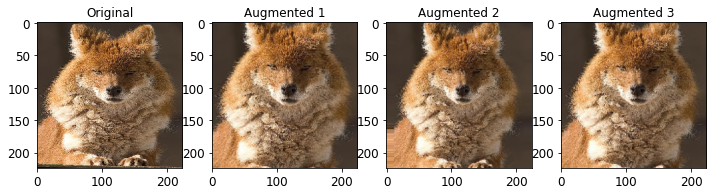

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                            zoom_range=0.2,
                            fill_mode='nearest')

test_image_generator(datagen=datagen)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

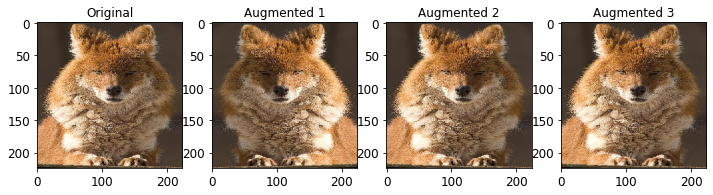

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                            horizontal_flip=True,
                            fill_mode='nearest')

test_image_generator(datagen=datagen)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

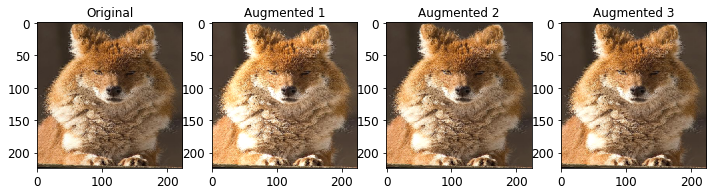

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                  channel_shift_range=100,
                                  )

test_image_generator(datagen=datagen)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

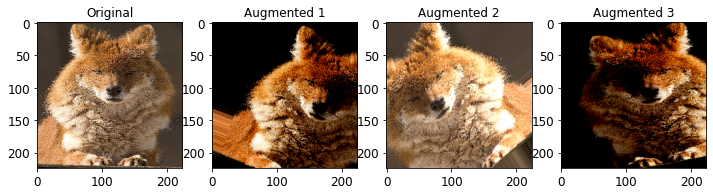

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  channel_shift_range=100,
                                  horizontal_flip=True,
                                  )

test_image_generator(datagen=datagen)

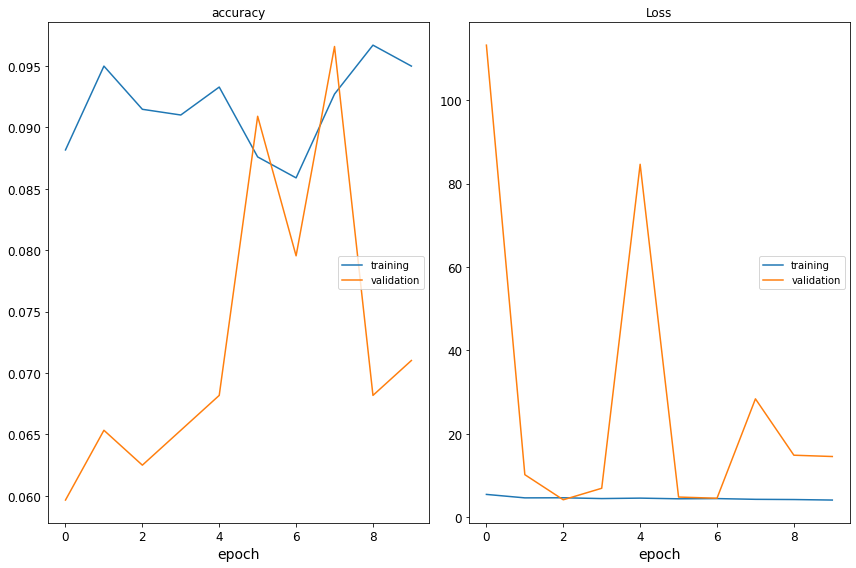

accuracy
	training         	 (min:    0.086, max:    0.097, cur:    0.095)
	validation       	 (min:    0.060, max:    0.097, cur:    0.071)
Loss
	training         	 (min:    4.088, max:    5.442, cur:    4.088)
	validation       	 (min:    4.154, max:  113.207, cur:   14.532)
55/55 [==============================] - 53s 962ms/step - loss: 4.0879 - accuracy: 0.0950 - val_loss: 14.5317 - val_accuracy: 0.0710
CPU times: user 13min 30s, sys: 20.7 s, total: 13min 51s
Wall time: 10min 42s


In [ ]:
%%time

from functools import partial
from livelossplot import PlotLossesKeras

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
        DefaultConv2D(filters=64, input_shape=[224,224,3]),
        DefaultConv2D(filters=64),
        DefaultMaxPooling(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        DefaultMaxPooling(),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        DefaultMaxPooling(),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultMaxPooling(),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultConv2D(filters=512),
        DefaultMaxPooling(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation = 'softmax')
])


batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  channel_shift_range=20,
                                  horizontal_flip=True,
                                  )

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    target_size=(224,224),
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")


val_datagen = ImageDataGenerator(rescale=1./255)


val_generator = val_datagen.flow_from_directory(VAL_PATH,
                                          target_size=(224,224),
                                          shuffle=False,
                                          batch_size=batch_size,
                                          class_mode='categorical')

model.compile(loss="categorical_crossentropy", 
              optimizer="rmsprop",
              metrics=["accuracy"])


FILE_PATH = MODELS_PATH + "/my_vgg_model_data_augmented.h5"

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='min')

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min',
                                                  restore_best_weights=True)

plot_loss_cb = PlotLossesKeras()

epochs = 10

history = model.fit(
                train_generator,
                steps_per_epoch = train_size // batch_size,
                epochs=epochs,
                validation_data=val_generator,
                validation_steps = val_size // batch_size,
                callbacks=[checkpoint_cb,
                           early_stopping_cb,
                           plot_loss_cb])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  shuffle=False,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')


results = model.evaluate(test_generator, steps=test_size // batch_size)
print(f"test loss, test acc: {results}")

Found 231 images belonging to 15 classes.
7/7 [==============================] - 3s 321ms/step - loss: 14.2390 - accuracy: 0.0759
test loss, test acc: [14.238987922668457, 0.0758928582072258]


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)


from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
num_classes = 15
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(num_classes, activation = 'softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

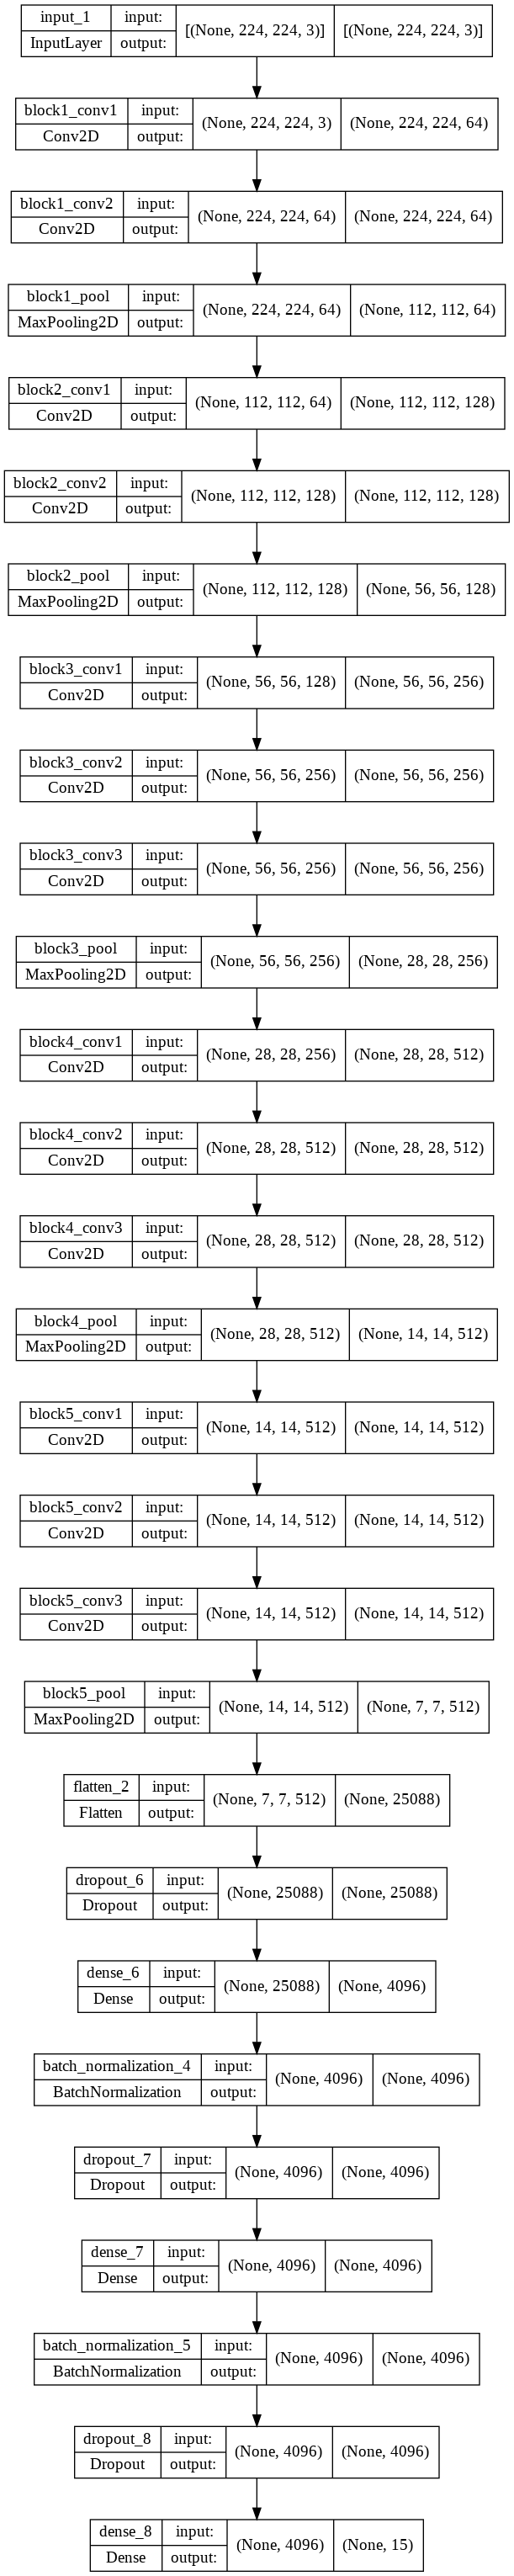

In [ ]:
FIGS_PATH = os.path.join(PROJECT_ROOT_DIR, "figures")
os.makedirs(FIGS_PATH, exist_ok=True)
keras.utils.plot_model(model, FIGS_PATH + "/transfer_vgg16_model.png", show_shapes=True)

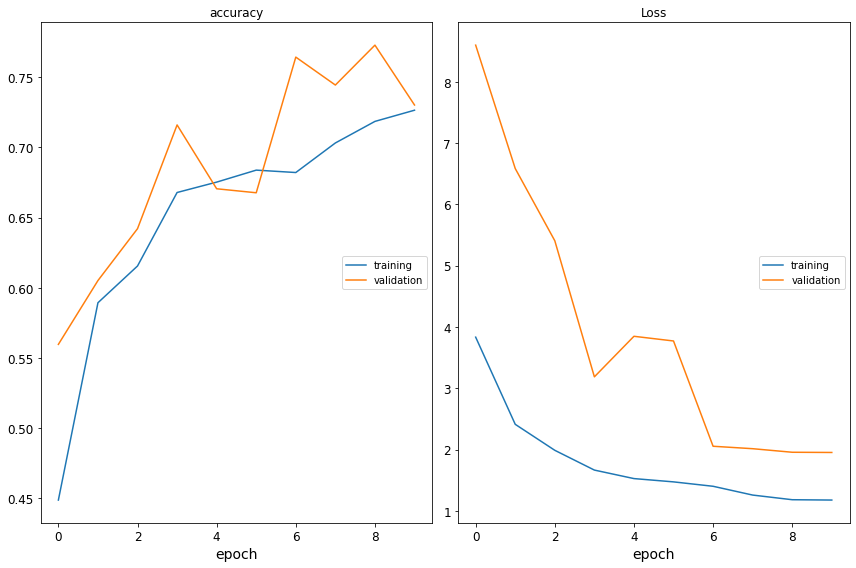

accuracy
	training         	 (min:    0.449, max:    0.726, cur:    0.726)
	validation       	 (min:    0.560, max:    0.773, cur:    0.730)
Loss
	training         	 (min:    1.175, max:    3.833, cur:    1.175)
	validation       	 (min:    1.952, max:    8.599, cur:    1.952)
55/55 [==============================] - 40s 731ms/step - loss: 1.1750 - accuracy: 0.7264 - val_loss: 1.9516 - val_accuracy: 0.7301
CPU times: user 7min 26s, sys: 19.9 s, total: 7min 46s
Wall time: 9min 9s


In [ ]:
%%time 

import os

from keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras

IMAGES_PATH = os.path.join(DATA_PATH, "Images")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
VAL_PATH = os.path.join(DATA_PATH, "val")
TEST_PATH = os.path.join(DATA_PATH, "test")

batch_size = 32

train_datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  channel_shift_range=20,
                                  horizontal_flip=True,
                                  preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    target_size=(224,224),
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")


val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


val_generator = val_datagen.flow_from_directory(VAL_PATH,
                                          target_size=(224,224),
                                          shuffle=False,
                                          batch_size=batch_size,
                                          class_mode='categorical')

model.compile(loss="categorical_crossentropy", 
              optimizer="rmsprop", 
              metrics=["accuracy"])

MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
FILE_PATH = MODELS_PATH + "/transfert_vgg_model.h5"

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='max')


early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min',
                                                  verbose=1,
                                                  restore_best_weights=True)
plot_loss_cb = PlotLossesKeras()


epochs = 10

history = model.fit(
                train_generator,
                steps_per_epoch = train_size // batch_size,
                epochs=epochs,
                validation_data=val_generator,
                validation_steps = val_size // batch_size,
                callbacks=[checkpoint_cb,
                           early_stopping_cb,
                           plot_loss_cb])

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  shuffle=False,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

results = model.evaluate(test_generator, steps=test_size // batch_size)
print(f"test loss, test acc: {results}")

Found 231 images belonging to 15 classes.
7/7 [==============================] - 2s 291ms/step - loss: 3.0493 - accuracy: 0.7054
test loss, test acc: [3.049264669418335, 0.7053571343421936]


In [ ]:
WEIGHTS_PATH = MODELS_PATH + "/transfert_vgg_weights.ckpt"

model.save(FILE_PATH)
model.save_weights(WEIGHTS_PATH)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input



base_model = ResNet50(include_top=False,
                  input_shape = (224,224,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
num_classes = 15
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(num_classes, activation = 'softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

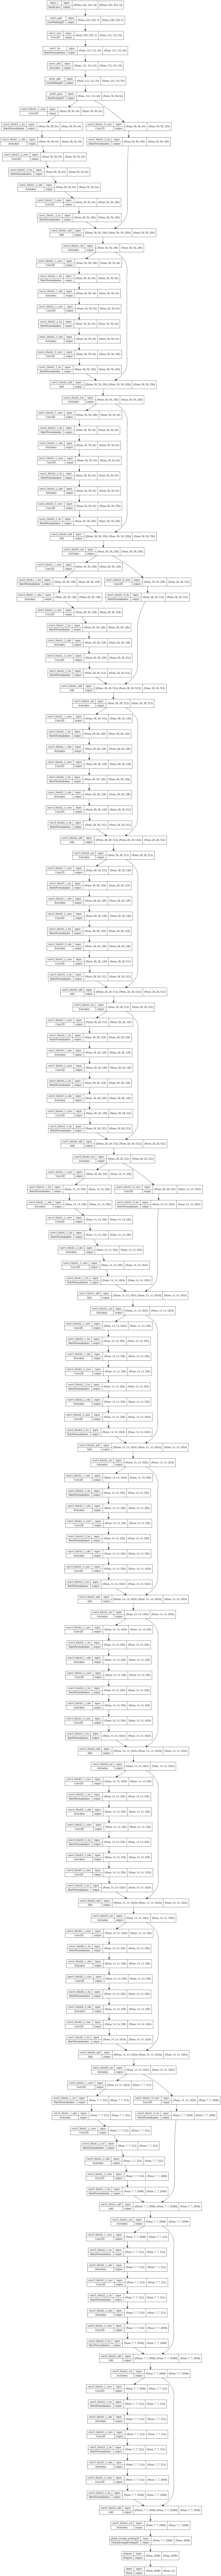

In [ ]:
FIGS_PATH = os.path.join(PROJECT_ROOT_DIR, "figures")
os.makedirs(FIGS_PATH, exist_ok=True)
keras.utils.plot_model(model, FIGS_PATH + "/transfer_resnet50_model.png", show_shapes=True)

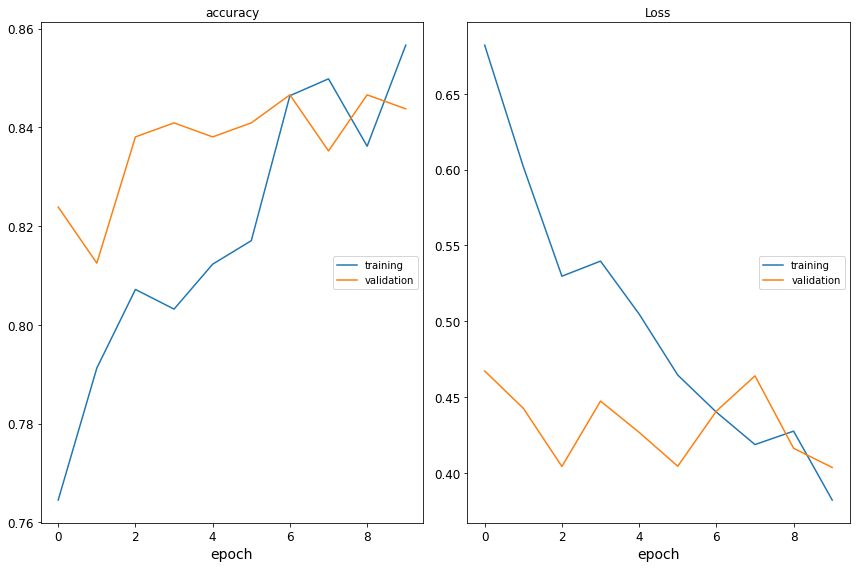

accuracy
	training         	 (min:    0.765, max:    0.857, cur:    0.857)
	validation       	 (min:    0.812, max:    0.847, cur:    0.844)
Loss
	training         	 (min:    0.382, max:    0.682, cur:    0.382)
	validation       	 (min:    0.404, max:    0.467, cur:    0.404)
55/55 [==============================] - 34s 616ms/step - loss: 0.3821 - accuracy: 0.8567 - val_loss: 0.4036 - val_accuracy: 0.8438
CPU times: user 6min 13s, sys: 11.3 s, total: 6min 24s
Wall time: 6min 57s


In [ ]:
%%time 

import os

from keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras

IMAGES_PATH = os.path.join(DATA_PATH, "Images")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
VAL_PATH = os.path.join(DATA_PATH, "val")
TEST_PATH = os.path.join(DATA_PATH, "test")

batch_size = 32

train_datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  channel_shift_range=20,
                                  horizontal_flip=True,
                                  preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    target_size=(224,224),
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")


val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


val_generator = val_datagen.flow_from_directory(VAL_PATH,
                                          target_size=(224,224),
                                          shuffle=False,
                                          batch_size=batch_size,
                                          class_mode='categorical')

model.compile(loss="categorical_crossentropy", 
              optimizer='rmsprop', 
              metrics=["accuracy"])

MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
FILE_PATH = MODELS_PATH + "/transfert_resnet50_model.h5"

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='max')

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min',
                                                  verbose=1,
                                                  restore_best_weights=True)
plot_loss_cb = PlotLossesKeras()


epochs = 10

history = model.fit(
                train_generator,
                steps_per_epoch = train_size // batch_size,
                epochs=epochs,
                validation_data=val_generator,
                validation_steps = val_size // batch_size,
                callbacks=[checkpoint_cb,
                           early_stopping_cb,
                           plot_loss_cb])

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  shuffle=False,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

results = model.evaluate(test_generator, steps=test_size // batch_size)
print(f"test loss, test acc: {results}")

Found 231 images belonging to 15 classes.
7/7 [==============================] - 2s 225ms/step - loss: 0.5069 - accuracy: 0.8214
test loss, test acc: [0.5068979263305664, 0.8214285969734192]


In [ ]:
WEIGHTS_PATH = MODELS_PATH + "/transfert_resnet50_weights.ckpt"

model.save(FILE_PATH)
model.save_weights(WEIGHTS_PATH)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

from tensorflow.keras.applications.xception import Xception, preprocess_input



base_model = Xception(include_top=False,
                  input_shape = (299,299,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:
num_classes = 15
x = keras.layers.BatchNormalization()(base_model.output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

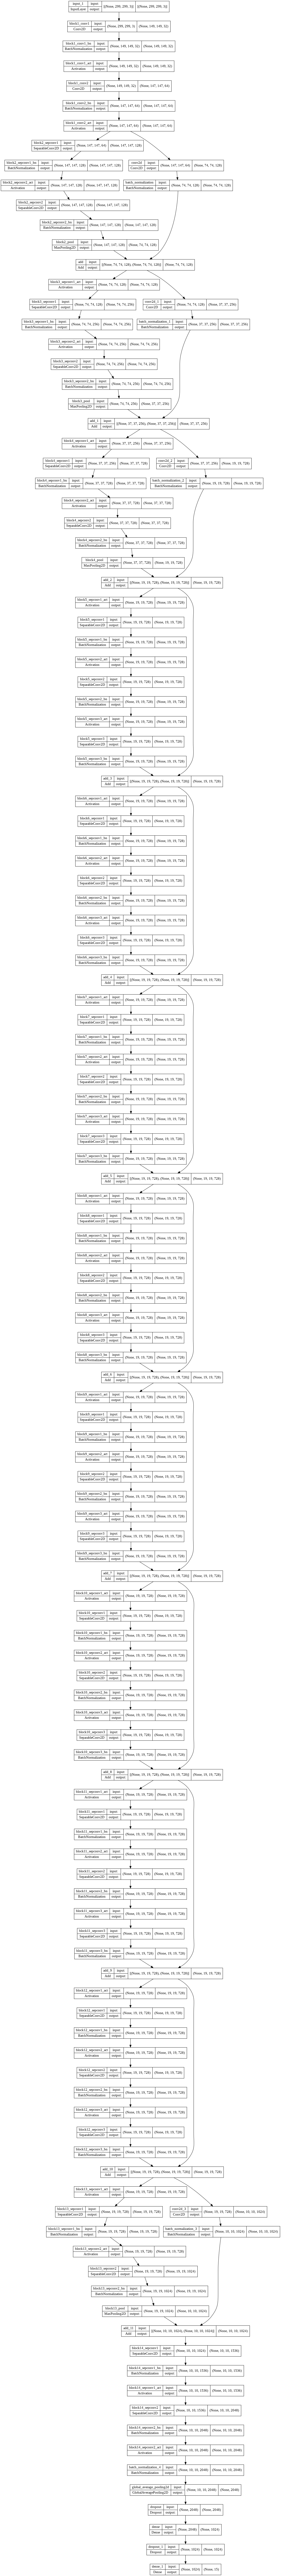

In [ ]:
FIGS_PATH = os.path.join(PROJECT_ROOT_DIR, "figures")
os.makedirs(FIGS_PATH, exist_ok=True)
keras.utils.plot_model(model, FIGS_PATH + "/transfer_xception_model.png", show_shapes=True)

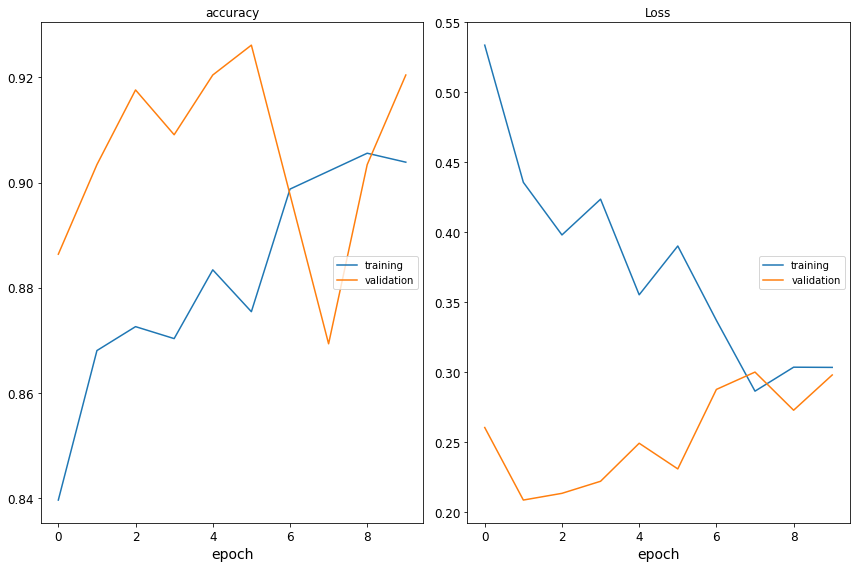

accuracy
	training         	 (min:    0.840, max:    0.906, cur:    0.904)
	validation       	 (min:    0.869, max:    0.926, cur:    0.920)
Loss
	training         	 (min:    0.287, max:    0.534, cur:    0.304)
	validation       	 (min:    0.209, max:    0.300, cur:    0.298)
55/55 [==============================] - 58s 1s/step - loss: 0.3036 - accuracy: 0.9039 - val_loss: 0.2982 - val_accuracy: 0.9205
CPU times: user 10min 17s, sys: 20.5 s, total: 10min 37s
Wall time: 11min 24s


In [ ]:
%%time 

import os

from keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras

IMAGES_PATH = os.path.join(DATA_PATH, "Images")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
VAL_PATH = os.path.join(DATA_PATH, "val")
TEST_PATH = os.path.join(DATA_PATH, "test")

batch_size = 32

train_datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  channel_shift_range=20,
                                  horizontal_flip=True,
                                  preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    target_size=(299,299),
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")


val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


val_generator = val_datagen.flow_from_directory(VAL_PATH,
                                          target_size=(299,299),
                                          shuffle=False,
                                          batch_size=batch_size,
                                          class_mode='categorical')

model.compile(loss="categorical_crossentropy", 
              optimizer='rmsprop', 
              metrics=["accuracy"])

MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
FILE_PATH = MODELS_PATH + "/transfert_xception_model.h5"

checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='max')

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min',
                                                  verbose=1,
                                                  restore_best_weights=True)
plot_loss_cb = PlotLossesKeras()


epochs = 10

history = model.fit(
                train_generator,
                steps_per_epoch = train_size // batch_size,
                epochs=epochs,
                validation_data=val_generator,
                validation_steps = val_size // batch_size,
                callbacks=[checkpoint_cb,
                           early_stopping_cb,
                           plot_loss_cb])

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  shuffle=False,
                                                  target_size=(299,299),
                                                  batch_size=32,
                                                  class_mode='categorical')

results = model.evaluate(test_generator, steps=test_size // batch_size)
print(f"test loss, test acc: {results}")

Found 231 images belonging to 15 classes.
7/7 [==============================] - 4s 511ms/step - loss: 0.4312 - accuracy: 0.8750
test loss, test acc: [0.4312485158443451, 0.875]


In [ ]:
WEIGHTS_PATH = MODELS_PATH + "/transfert_xception_weights.ckpt"

model.save(FILE_PATH)
model.save_weights(WEIGHTS_PATH)

In [1]:
from  keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
from PIL import Image

MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
FILE_PATH = MODELS_PATH + "/transfert_xception_model.h5"

class_names = []
for breed in sorted(os.listdir(IMAGES_PATH)):
  splitted_breed = breed.split('-')
  if len(splitted_breed) > 2:
    class_names.append('-'.join(splitted_breed[1:]))
  else:
    class_names.append(splitted_breed[1])
  
model = keras.models.load_model(FILE_PATH)

test_image_path = '/content/data/téléchargement.jfif'
img = image.load_img(test_image_path)

plt.imshow(img)

img = img.resize((299,299),Image.ANTIALIAS)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

def predict(img, class_names):
  """
  Predict dog breed from a photo

  Args:
    img(array): Transformed image into array

    class_names(list): list of class names

  Returns:
    pred_lab(string): predicted label

  """
  preds = model.predict(img_tensor)

  pred_label =  class_names[np.argmax(preds)]

  return pred_label

prediction = predict(img_tensor, class_names=class_names)

print(f"Label prédit: {prediction}")

NameError: ignored

In [ ]:
import pickle

filename = MODELS_PATH + '/class_names.save'
pickle.dump(class_names, open(filename, 'wb'))